In [1]:
import os
import pandas as pd
from bertopic import BERTopic
from nltk.tokenize import word_tokenize
from utils.filemanagement import load_from_file
from utils.filemanagement import get_project_root


In [2]:
model_type="bertopic"
model_name="BERTopic"
embedding_model = "preliminary"
data_type="np_mini_stopwords"
file_name_data = f"{data_type}.csv"
file_name = f"{model_type}_{embedding_model}_{data_type}"

folder_path_data =f"preprocessed_data"
df = load_from_file(folder_path_data,file_name_data)
TOPN = 20

folder_path_word_cloud = f"preprocessed_data/wordclouds/preliminary/{file_name}"
folder_name = f"Preliminary-experiment/models/{model_type}"
random_sample = False
seed = 42
ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)


In [3]:
data = df.text.values.tolist()
timestamps = df.date.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))

In [4]:
topic_model = BERTopic()
try:
    topic_model = topic_model.load(file_path)
except:
    topics,probs = topic_model.fit_transform(documents=new_data)

In [5]:
topic_model.get_topic_info()

Topic  Count                                               Name
0      -1   1797  -1_regjeringen_statsrden_fremskrittspartiet_norge
1       0    280  0_stortinget_fremskrittspartiet_skolen_regjeri...
2       1    143         1_arbeiderpartiet_arbeidslivet_arbeid_jobb
3       2     95                   2_land_norge_landbruk_landbruket
4       3     65                   3_statsrden_takker_sprsml_svaret
5       4     64   4_finansministeren_bank_konomi_sentralbanksjefen
6       5     60                    5_barn_barnevernet_barna_barnet
7       6     59             6_vegne_representantene_forslag_fremme
8       7     57                  7_milliarder_kr_milliardar_skjrer
9       8     47  8_arbeiderpartiet_arbeiderpartiets_arbeidarpar...
10      9     44             9_fly_flyktninger_gardermoen_statsrden
11     10     44                 10_afghanistan_irak_militre_saddam
12     11     43                     11_gass_gasskraftverk_krst_co2
13     12     38         12_statsrden_industrien_industri_bioenergi
14     13     36            13_studenter_studentene_utdanning_hyere
15     14     36                14_befolkningen_sv_mattilsynet_skip
16     15     35         15_representanten_bistand_tyrkia_forskning
17     16     34  16_politiet_justisministeren_statsrden_politid...
18     17     32                 17_atomvpen_nrk_politiske_politiet
19     18     29               18_signal_signaler_statsrden_fornebu
20     19     28                  19_nsker_stille_flgende_statsrden
21     20     26                       20_kunst_kultur_akks_museene
22     21     26      21_motsegner_transportplan_nasjonal_jernbanen
23     22     25  22_penger_fremskrittspartiet_privatskoler_regj...
24     23     24               23_barn_barnehager_barnehagene_barna
25     24     23        24_transport_senterpartiet_statsrden_pengar
26     25     23          25_president_presidenten_votering_forslag
27     26     22      26_statsrden_regjeringen_statsministeren_tror
28     27     22  27_befolkningen_hyre_menneskerettsministeren_k...
29     28     21   28_etiopia_presidentskapet_presidenten_president
30     29     20  29_samfunnskunnskap_energi_kraft_introduksjons...
31     30     20  30_rehabilitering_pasienter_behandling_pasientene
32     31     20                         31_jobbe_jobben_ikt_jobbar
33     32     20                       32_sokkel_olje_felt_fjordane
34     33     19                         33_land_norge_eu_produsere
35     34     18               34_kristelig_folkeparti_folk_utvides
36     35     18  35_representanten_lundteigen_barnevernet_smutt...
37     36     17        36_mill_kr_treforedlingsindustrien_forsking
38     37     16             37_palestinsk_israel_palestinske_hamas
39     38     16            38_religion_bnnerop_muslimske_christian
40     39     16                39_bergen_bybane_hurtigruta_bybanen
41     40     16                         40_nato_usa_natos_atomvpen
42     41     15  41_kyotoavtalen_gasskraftverk_kyotoforpliktels...
43     42     15          42_nordisk_nordiske_samarbeid_samarbeidet
44     43     15              43_statsministeren_statsrden_rv_skadd
45     44     14                       44_stemme_nr_stemmer_forslag
46     45     13        45_ministeren_lokalsykehus_narvik_kampanjer
47     46     12    46_selskapsskatten_kommunene_sortevik_veterinre
48     47     12    47_dab_radioen_borgarane_datalagringsdirektivet
49     48     10      48_helseministeren_rede_helseminister_sykehus

In [6]:
topics = topic_model.get_topics()

In [7]:
topic_model.visualize_topics()

In [8]:
topic_model.save(file_path)

In [9]:
topics

{-1: [('regjeringen', 0.008897023874939895),
  ('statsrden', 0.008837195855012839),
  ('fremskrittspartiet', 0.008513889271668958),
  ('norge', 0.008397169075858722),
  ('representanten', 0.007880403236969298),
  ('gjelder', 0.007821401333340906),
  ('stortinget', 0.007297799189143139),
  ('nsker', 0.007181531169820466),
  ('kr', 0.007009455766211011),
  ('sv', 0.006972135286408788)],
 0: [('stortinget', 0.010191970799975428),
  ('fremskrittspartiet', 0.009732722739225735),
  ('skolen', 0.00930846418287547),
  ('regjeringen', 0.008779573124392913),
  ('sv', 0.008347038101208314),
  ('forslag', 0.008291986825791171),
  ('kommunene', 0.007899240936423283),
  ('gjelder', 0.007665188308562836),
  ('mte', 0.007207870971958149),
  ('representanten', 0.006623964371312686)],
 1: [('arbeiderpartiet', 0.018669464120596398),
  ('arbeidslivet', 0.011948280316960732),
  ('arbeid', 0.01012208013086277),
  ('jobb', 0.009757825030509527),
  ('gjelder', 0.008390789097325825),
  ('representanten', 0.007

In [10]:
NUM_TOPICS = len(topic_model.topic_sizes_.keys())-1

In [11]:
reck = [dict(topics[i]) for i in range(NUM_TOPICS)]

In [12]:
print(reck)

[{'stortinget': 0.010191970799975428, 'fremskrittspartiet': 0.009732722739225735, 'skolen': 0.00930846418287547, 'regjeringen': 0.008779573124392913, 'sv': 0.008347038101208314, 'forslag': 0.008291986825791171, 'kommunene': 0.007899240936423283, 'gjelder': 0.007665188308562836, 'mte': 0.007207870971958149, 'representanten': 0.006623964371312686}, {'arbeiderpartiet': 0.018669464120596398, 'arbeidslivet': 0.011948280316960732, 'arbeid': 0.01012208013086277, 'jobb': 0.009757825030509527, 'gjelder': 0.008390789097325825, 'representanten': 0.00781035487077941, 'fremskrittspartiet': 0.007800073259169896, 'jobbe': 0.007507343782720426, 'tiltak': 0.007339351282436642, 'arbeidsliv': 0.007260581266374236}, {'land': 0.024785431438555494, 'norge': 0.01414224491570158, 'landbruk': 0.01363346133787437, 'landbruket': 0.012651209555452297, 'landene': 0.01135018468235634, 'verden': 0.009390151347605524, 'landet': 0.009349034190810956, 'fn': 0.008592317638548706, 'noreg': 0.008185393430615862, 'surrogat

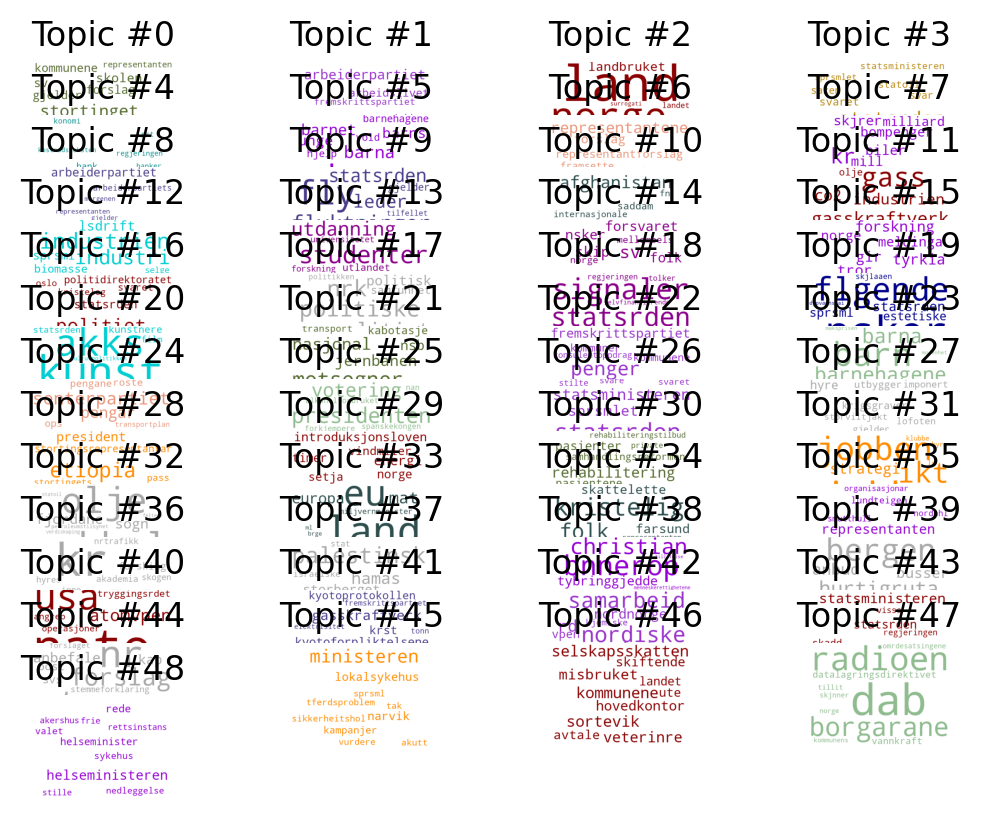

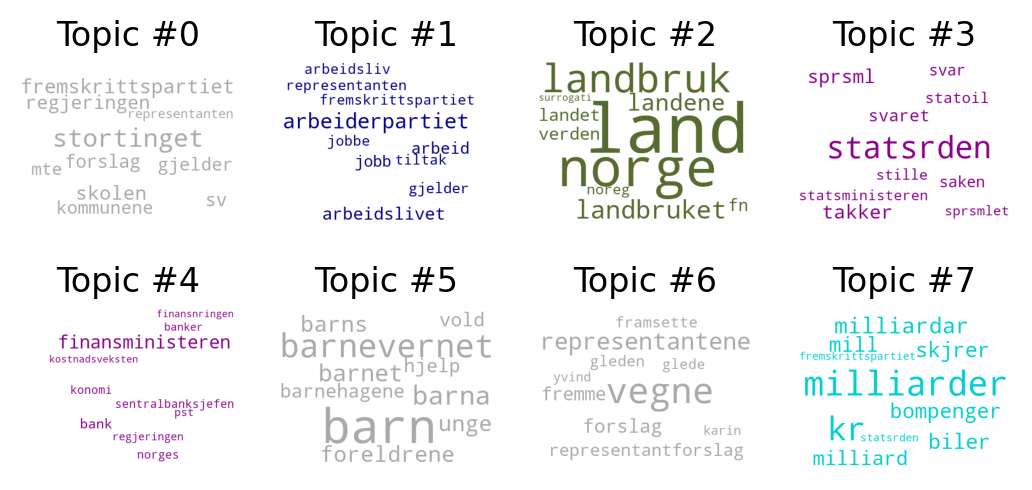

In [13]:
NUM_TOPICS = len(topic_model.topic_sizes_.keys()) - 1
formatted_topics = [dict(topics[i]) for i in range(NUM_TOPICS)]
from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds(reck, f"{model_name}-{embedding_model}: {data_type}", NUM_TOPICS, dpi=200)
from utils.filemanagement import make_excerpt_wordcloud

excerpt_wordcloud = make_excerpt_wordcloud(formatted_topics, NUM_TOPICS,
                                           f"Sample from {model_name}-{embedding_model}: {data_type}",
                                           random_sample=random_sample, seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH, folder_path_word_cloud, f"{file_name}_wordcloud_sample"),bbox_inches="tight")

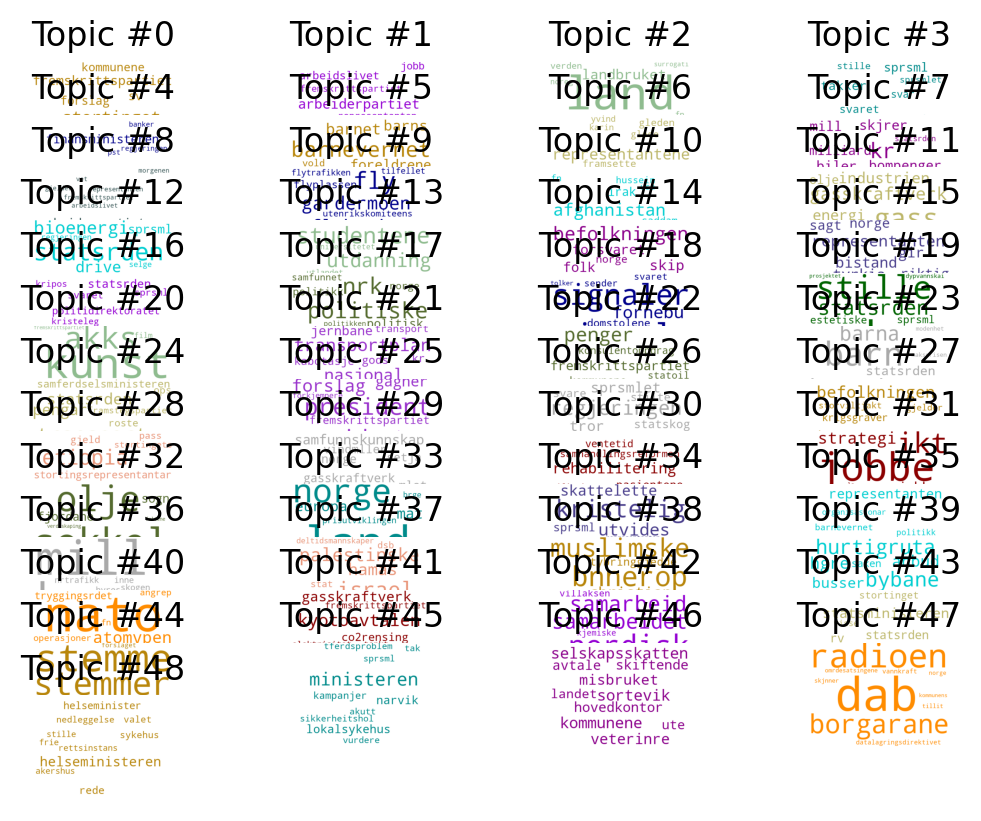

In [14]:
from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds(reck, f"{model_name}-{embedding_model}: {data_type}", NUM_TOPICS, dpi=200)

In [15]:
from utils.tables_and_plots import create_wordcloud

wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))
file_name_model = "wordcloud"
for i in range(NUM_TOPICS):
    topic_wordcloud = create_wordcloud(dict(topics[i]))
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [16]:
from utils.filemanagement import write_topics_file
topic_words_numbered = []
for i, key in enumerate(topics.keys()):
    if key == -1:
        continue
    r = topics[key]
    rr = []
    for item in r:
        rr.append(item[0])
    topic_words_numbered.append((i,rr))
folder_path_topics = r"preprocessed_data/results"


write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [17]:
from utils.filemanagement import load_model_topics


loaded_topics = load_model_topics(folder_path_topics, file_name)


In [18]:
folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [19]:
from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [20]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [21]:
from utils.stats import compute_metrics

coherence, diversity = compute_metrics(
    loaded_topics.values(), word_frequencies, word_co_frequencies, 10)

10
('fremskrittspartiet', 'stortinget') wordtuple
('fremskrittspartiet', 'stortinget') wordup
1167.0 over
2995538.0 under
-11.325794858593353 -10.188588845707349 1.1116156545432816 ('fremskrittspartiet', 'stortinget') 1167 1526 1963
('skolen', 'stortinget') wordtuple
('skolen', 'stortinget') wordup
213.0 over
587510.0 under
-11.429544262190957 -7.734709620225839 1.4776953270880822 ('skolen', 'stortinget') 213 1526 385
('regjeringen', 'stortinget') wordtuple
('regjeringen', 'stortinget') wordup
2053.0 over
3317524.0 under
-10.658157559753239 -11.003517912108602 0.9686136420084963 ('regjeringen', 'stortinget') 2053 1526 2174
('stortinget', 'sv') wordtuple
('stortinget', 'sv') wordup
1070.0 over
2047892.0 under
-10.902313121746205 -10.06339508128851 1.083363321590896 ('stortinget', 'sv') 1070 1526 1342
('forslag', 'stortinget') wordtuple
('forslag', 'stortinget') wordup
1071.0 over
1747270.0 under
-10.671928365068581 -10.064742764750257 1.0603279800100673 ('forslag', 'stortinget') 1071 15

In [22]:
from nltk import word_tokenize
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

-0.10332115111037576


In [23]:
print(diversity)

0.7795918367346939


In [24]:
print(coherence)

0.8304311467951121


In [25]:
from tabulate import tabulate
import csv

In [26]:
# Check the stats for the dataset after running basic pipeline

models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒════════════════════════════════════════╤═══════════╤══════════╕
│ Model                                  │ Metric    │    Value │
╞════════════════════════════════════════╪═══════════╪══════════╡
│ bertopic_preliminary_np_mini_stopwords │ coherence │ 0.830431 │
├────────────────────────────────────────┼───────────┼──────────┤
│ bertopic_preliminary_np_mini_stopwords │ diversity │ 0.779592 │
╘════════════════════════════════════════╧═══════════╧══════════╛


In [27]:
# Save all topic stats to file

topic_stats_folder_path = f"preprocessed_data/metrics/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})